# Latent Diritchet Allocation

---

## Topic Modeling - Unsupervised Learning

Leer documentos no etiquetados y obtener un listado de posibles tópicos de manera no supervisada

In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel, LdaMulticore
import nltk
import numpy as np
import spacy
from document import Document
import pandas as pd
import util.log as log
log.init_logger()
from util.data_cleaning import preprocess
from util.graphics.word_cloud import show_word_cloud
from util.graphics.bar import show_bar_graphic

In [3]:
dataframe = pd.read_csv('data.csv')
preprocessed_docs = dataframe['string'].map(preprocess)

In [4]:
id2token = gensim.corpora.Dictionary(preprocessed_docs)

In [5]:
id2token.filter_extremes(no_below=5, no_above=0.5)
bag_of_words = [id2token.doc2bow(doc) for doc in preprocessed_docs]
bag_of_words_tf_dif = TfidfModel(bag_of_words)[bag_of_words]

In [6]:
lda_model = LdaMulticore(bag_of_words, num_topics=10, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [7]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.028*"adoptar" + 0.019*"innovador" + 0.019*"consumidor" + 0.015*"modelo" + 0.015*"gente" + 0.015*"grupo" + 0.011*"determinante" + 0.011*"coeficiente" + 0.010*"uso" + 0.010*"rol"

Topic: 1
Words: 0.018*"coste" + 0.013*"tarea" + 0.012*"concepto" + 0.012*"compartir" + 0.012*"favorecer" + 0.011*"global" + 0.010*"ley" + 0.009*"apertura" + 0.009*"coase" + 0.009*"capacidad"

Topic: 2
Words: 0.030*"emergente" + 0.027*"complejo" + 0.026*"conducta" + 0.023*"organismo" + 0.018*"desarrollar" + 0.017*"comportamiento" + 0.015*"superior" + 0.015*"regla" + 0.015*"agente" + 0.014*"simple"

Topic: 3
Words: 0.065*"experiencia" + 0.060*"cliente" + 0.018*"masivo" + 0.017*"valor" + 0.010*"sacrificio" + 0.010*"oferta" + 0.009*"necesidad" + 0.009*"ciberespacio" + 0.009*"campo" + 0.008*"tema"

Topic: 4
Words: 0.027*"venta" + 0.023*"plataforma" + 0.017*"modelo" + 0.017*"online" + 0.015*"digital" + 0.013*"comprador" + 0.011*"negocio" + 0.011*"conocimiento" + 0.011*"ofrecer" + 0.010*"crecer"

Top

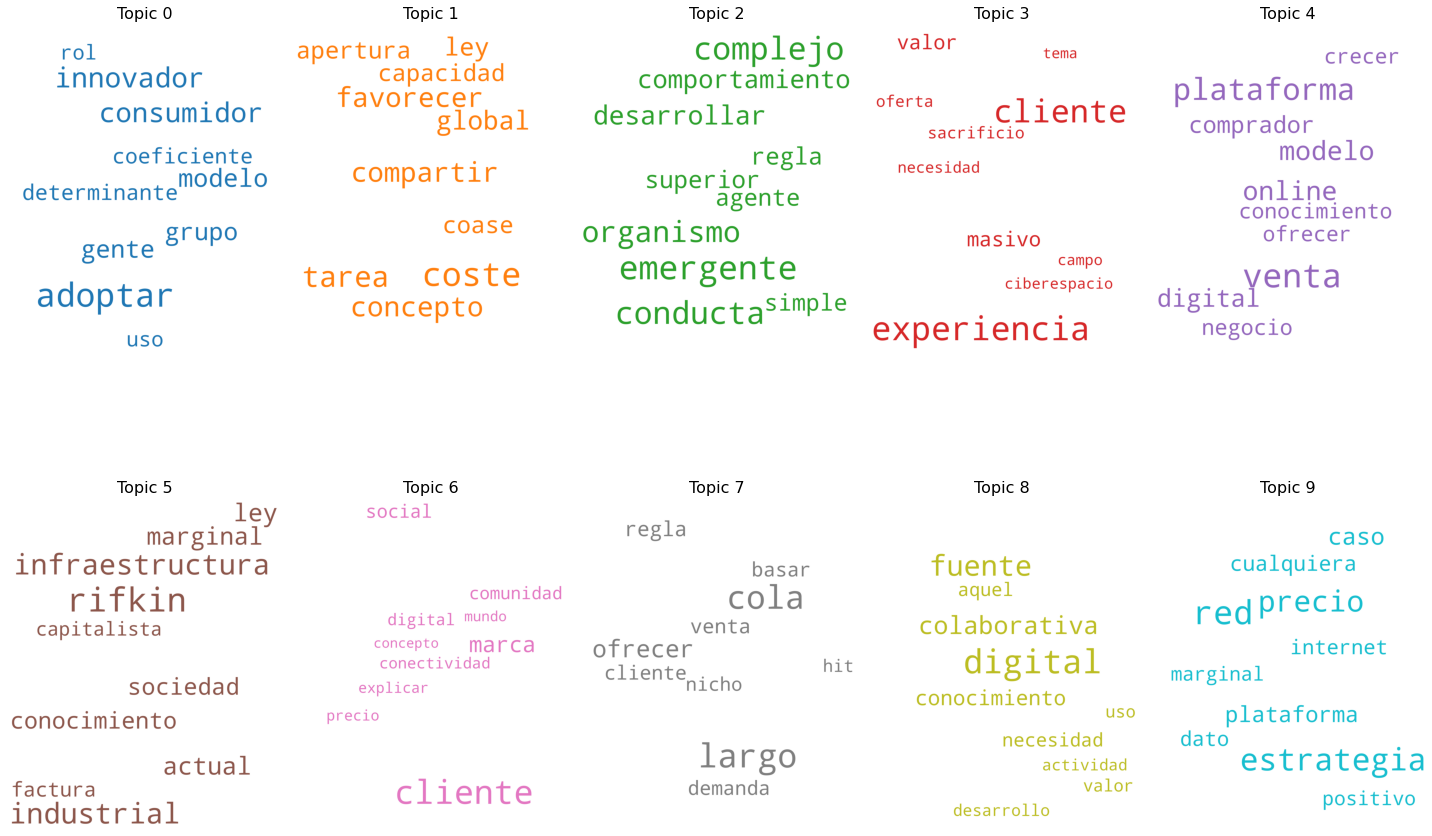

In [8]:
show_word_cloud(lda_model, rows = 2, columns = 5)

In [9]:
def get_topic(model, bow):
    possible_topics = lda_model[bow]
    max = 0
    pmax = 0

    for topic, probability in possible_topics:
        if probability > pmax:
            max = topic
            pmax = probability

    return max 


def get_dictionary(model, bag_of_words):
    topic_counts = {}
    for i in range(len(model.print_topics())):
        topic_counts['{}'.format(i)] = 0

    for bag in bag_of_words:
        topic_counts['{}'.format(get_topic(lda_model, bag))] += 1

    return topic_counts

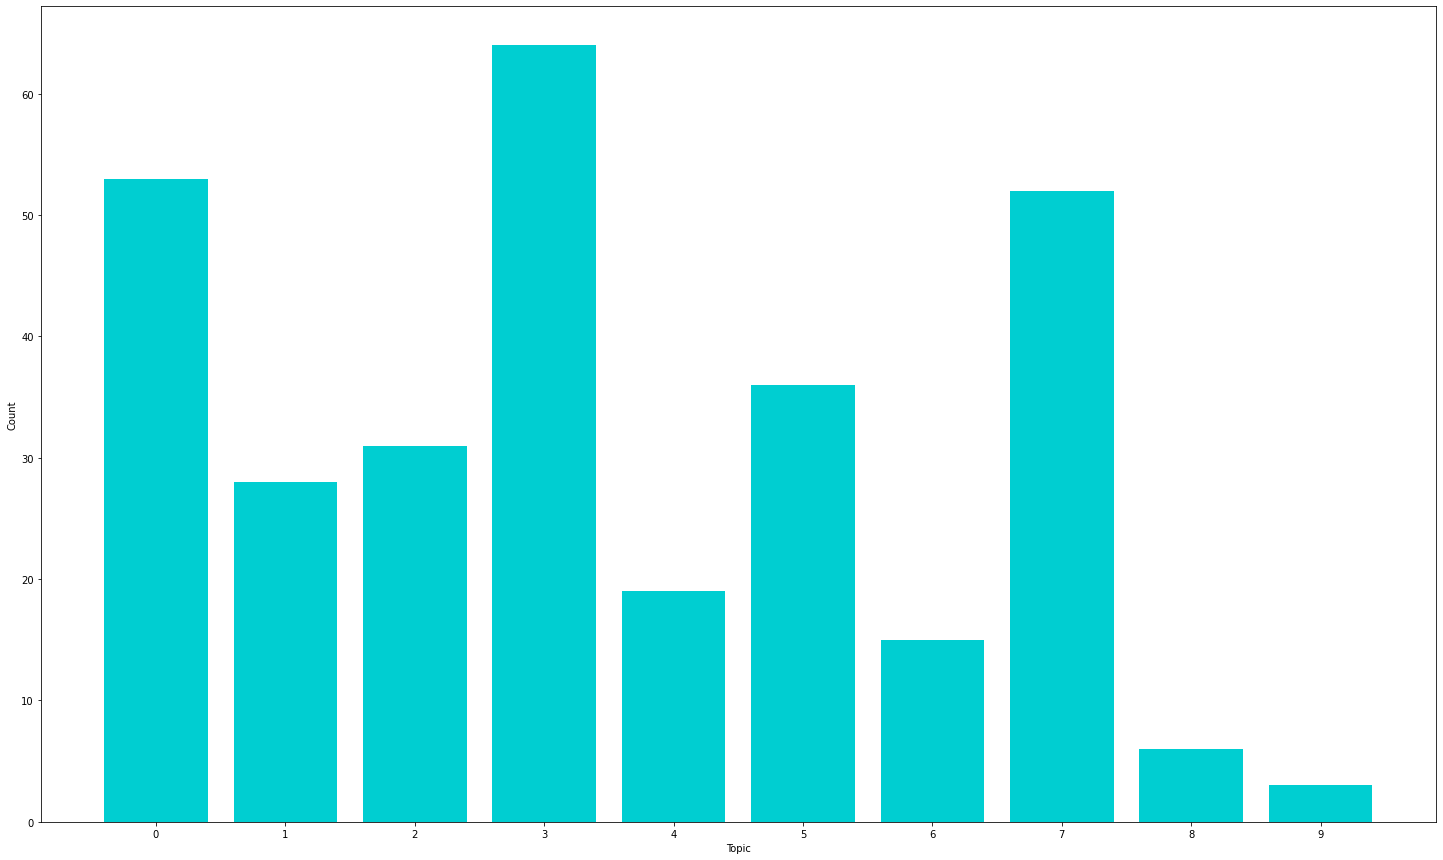

In [10]:
show_bar_graphic(get_dictionary(lda_model, bag_of_words), 'Topic', 'Count')

In [11]:
lda_model = LdaMulticore(bag_of_words, num_topics=2, id2word=id2token, passes=100, workers=6, iterations = 100, random_state=0)

In [12]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}\nWords: {}\n'.format(idx, topic))

Topic: 0
Words: 0.018*"largo" + 0.015*"cola" + 0.010*"modelo" + 0.010*"adoptar" + 0.009*"consumidor" + 0.008*"ofrecer" + 0.007*"venta" + 0.007*"regla" + 0.007*"demanda" + 0.006*"gente"

Topic: 1
Words: 0.046*"cliente" + 0.029*"experiencia" + 0.011*"valor" + 0.009*"masivo" + 0.008*"precio" + 0.006*"explicar" + 0.006*"red" + 0.005*"marca" + 0.005*"oferta" + 0.005*"digital"



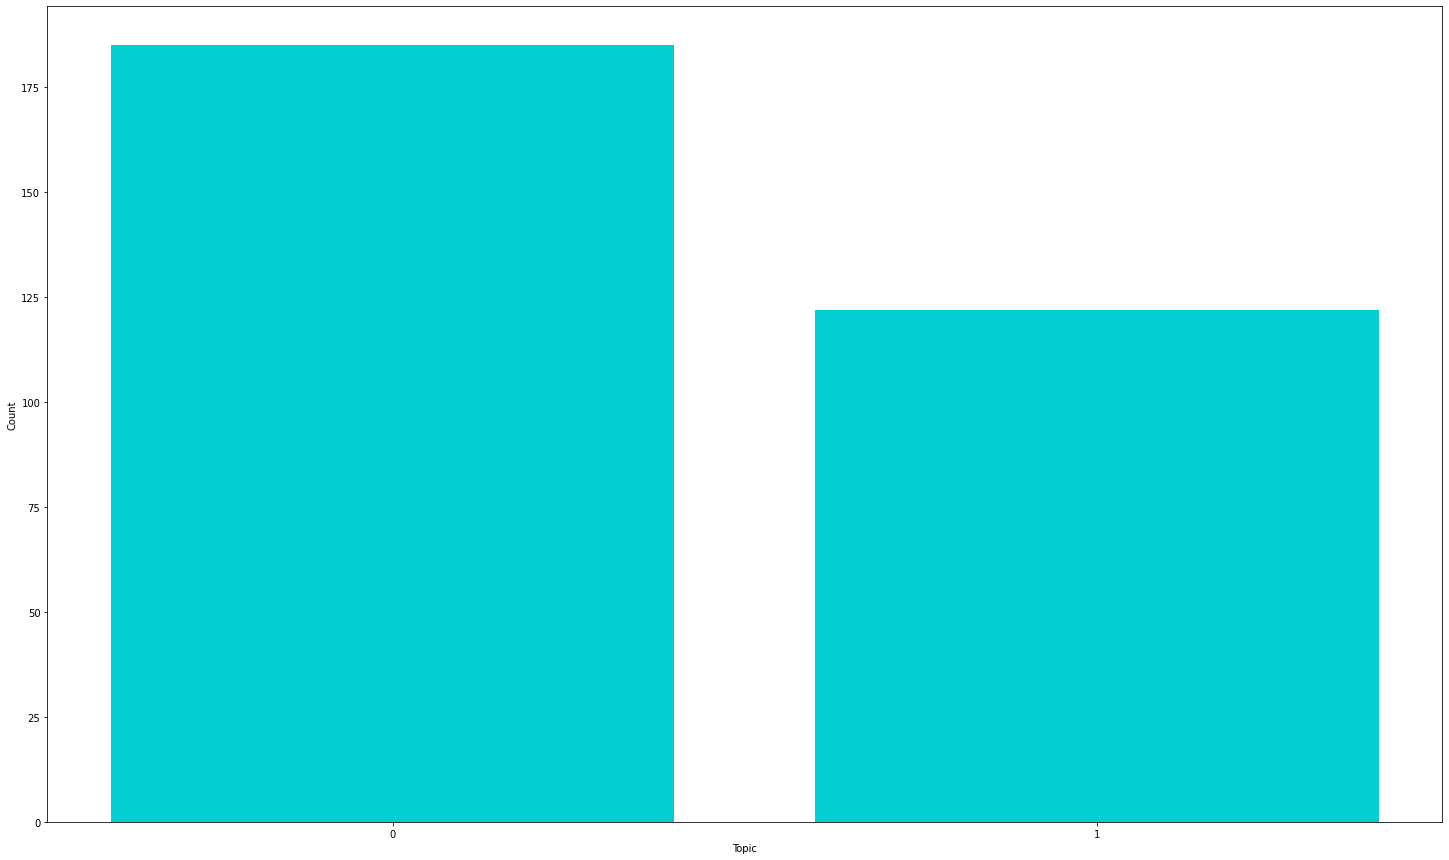

In [13]:
show_bar_graphic(get_dictionary(lda_model, bag_of_words), 'Topic', 'Count')